#📌 Extracão

In [1]:
import pandas as pd

In [2]:
dados = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformação

Extrair os dados que estão aninhados nas colunas 'customer','phone','internet' e 'account', para novas colunas individuais com o objetivo de facilitar a visualização e análise dos dados.

In [4]:
dados_cliente = dados['customer'].apply(pd.Series)
dados_telefone = dados['phone'].apply(pd.Series)
dados_internet = dados['internet'].apply(pd.Series)
dados_conta = dados['account'].apply(pd.Series)

dados = pd.concat([dados, dados_cliente, dados_telefone, dados_internet, dados_conta], axis=1)

dados.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   customer          7267 non-null   object
 3   phone             7267 non-null   object
 4   internet          7267 non-null   object
 5   account           7267 non-null   object
 6   gender            7267 non-null   object
 7   SeniorCitizen     7267 non-null   int64 
 8   Partner           7267 non-null   object
 9   Dependents        7267 non-null   object
 10  tenure            7267 non-null   int64 
 11  PhoneService      7267 non-null   object
 12  MultipleLines     7267 non-null   object
 13  InternetService   7267 non-null   object
 14  OnlineSecurity    7267 non-null   object
 15  OnlineBackup      7267 non-null   object
 16  DeviceProtection  7267 non-null   object
 17  TechSupport   

Da mesma forma, extrair os valores da coluna 'Charges' em mensais e totais, 'monthly' e 'total' respectivamente.

In [6]:
dados_cobrancas = dados['Charges'].apply(pd.Series)
dados['MonthlyCharges'] = dados_cobrancas['Monthly']
dados['TotalCharges'] = dados_cobrancas['Total']

dados.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.4


Transformando todas as colunas para minúsculo

In [7]:
dados.columns = dados.columns.str.lower()
dados.head()

,customerid,churn,customer,phone,internet,account,gender,seniorcitizen,partner,dependents,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges,monthlycharges,totalcharges
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.4


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   object 
 7   seniorcitizen     7267 non-null   int64  
 8   partner           7267 non-null   object 
 9   dependents        7267 non-null   object 
 10  tenure            7267 non-null   int64  
 11  phoneservice      7267 non-null   object 
 12  multiplelines     7267 non-null   object 
 13  internetservice   7267 non-null   object 
 14  onlinesecurity    7267 non-null   object 
 15  onlinebackup      7267 non-null   object 
 16  deviceprotection  7267 non-null   object 


Transformando os dados da coluna 'TotalCharges' em float

In [9]:
import numpy as np

In [10]:
dados['totalcharges'] = dados['totalcharges'].replace(' ', np.nan)
dados['totalcharges'] = dados['totalcharges'].astype(np.float64)

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   object 
 7   seniorcitizen     7267 non-null   int64  
 8   partner           7267 non-null   object 
 9   dependents        7267 non-null   object 
 10  tenure            7267 non-null   int64  
 11  phoneservice      7267 non-null   object 
 12  multiplelines     7267 non-null   object 
 13  internetservice   7267 non-null   object 
 14  onlinesecurity    7267 non-null   object 
 15  onlinebackup      7267 non-null   object 
 16  deviceprotection  7267 non-null   object 


Checar se existem valores nulos

In [12]:
print("Valores nulos por coluna")
print(dados.isnull().sum())

Valores nulos por coluna
customerid           0
churn                0
customer             0
phone                0
internet             0
account              0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
charges              0
monthlycharges       0
totalcharges        11
dtype: int64


Tratar os valores nulos da coluna 'totalcharges'

In [13]:
dados['totalcharges'] = dados['totalcharges'].fillna(0)
print("Valores nulos por coluna após preencher nulos em 'totalcharges':")
print(dados.isnull().sum())

Valores nulos por coluna após preencher nulos em 'totalcharges':
customerid          0
churn               0
customer            0
phone               0
internet            0
account             0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
charges             0
monthlycharges      0
totalcharges        0
dtype: int64


Retirando valores vazios da coluna 'churn'

In [14]:
print(dados['churn'].value_counts())

churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [15]:
dados = dados[dados['churn'] != '']
display(dados['churn'].value_counts())

,count
churn,
No,5174
Yes,1869


Criando a coluna 'Contas Diárias', que será escrita como 'dailycharges' no dataframe

In [16]:
dados['dailycharges'] = dados['monthlycharges'] / 30.44 # Esse valor é a quantidade média de dias por mês, 365/12= 30,4.
dados.head()

,customerid,churn,customer,phone,internet,account,gender,seniorcitizen,partner,dependents,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges,monthlycharges,totalcharges,dailycharges
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.30,2.155059
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.40,1.967806
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85,2.427727
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85,3.219448
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.40,2.756242


In [17]:
colunas_para_converter = ['partner','dependents','phoneservice','multiplelines',
                          'onlinesecurity','onlinebackup','deviceprotection','techsupport',
                          'streamingtv','streamingmovies','paperlessbilling','churn']
for col in colunas_para_converter:
  dados[col] = dados[col].replace({'Yes': 1, 'No': 0})
dados.head()


/tmp/ipython-input-3931247637.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados[col] = dados[col].replace({'Yes': 1, 'No': 0})


,customerid,churn,customer,phone,internet,account,gender,seniorcitizen,partner,dependents,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges,monthlycharges,totalcharges,dailycharges
0,0002-ORFBO,0,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,1,1,...,1,1,0,One year,1,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.30,2.155059
1,0003-MKNFE,0,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,0,...,0,0,1,Month-to-month,0,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.40,1.967806
2,0004-TLHLJ,1,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,0,0,...,0,0,0,Month-to-month,1,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85,2.427727
3,0011-IGKFF,1,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,1,0,...,0,1,1,Month-to-month,1,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85,3.219448
4,0013-EXCHZ,1,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,1,0,...,1,1,0,Month-to-month,1,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.40,2.756242


#📊 Carga e análise

In [18]:
dados.describe()

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,dailycharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.127519
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.988504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.599540
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.166229
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.311104
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.951708
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


Cálculo do custo médio das cobranças diárias, mensais e totais dos clientes

In [19]:
print(f'O custo médio diário dos clientes é de R${dados["dailycharges"].mean():.2f}')
print(f'O custo médio mensal dos clientes é de R${dados["monthlycharges"].mean():.2f}')
print(f'O custo médio total dos clientes é de R${dados["totalcharges"].mean():.2f}')

O custo médio diário dos clientes é de R$2.13
O custo médio mensal dos clientes é de R$64.76
O custo médio total dos clientes é de R$2279.73


Cálculo da mediana das cobranças diárias, mensais e totais dos clientes

In [20]:
print(f'O custo mediano diário dos clientes é de R${dados["dailycharges"].median():.2f}')
print(f'O custo mediano mensal dos clientes é de R${dados["monthlycharges"].median():.2f}')
print(f'O custo mediano total dos clientes é de R${dados["totalcharges"].median():.2f}')

O custo mediano diário dos clientes é de R$2.31
O custo mediano mensal dos clientes é de R$70.35
O custo mediano total dos clientes é de R$1394.55


Cálculo do cdesvio padrão das cobranças diárias, mensais e totais dos clientes

In [21]:
print(f'O desvio padrão diário dos clientes é de R${dados["dailycharges"].std():.2f}')
print(f'O desvio padrão mensal dos clientes é de R${dados["monthlycharges"].std():.2f}')
print(f'O desvio padrão total dos clientes é de R${dados["totalcharges"].std():.2f}')

O desvio padrão diário dos clientes é de R$0.99
O desvio padrão mensal dos clientes é de R$30.09
O desvio padrão total dos clientes é de R$2266.79


Número de clientes idosos

In [22]:
print(f'O número de clientes idosos é de {dados["seniorcitizen"].sum()}')

O número de clientes idosos é de 1142


Número de clientes homens e número de clientes mulheres

In [23]:
print(f'O número de clientes homens é de {dados["gender"].value_counts()[0]}')
print(f'O número de clientes mulheres é de {dados["gender"].value_counts()[1]}\n\n')

O número de clientes homens é de 3555
O número de clientes mulheres é de 3488




/tmp/ipython-input-814512434.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'O número de clientes homens é de {dados["gender"].value_counts()[0]}')
/tmp/ipython-input-814512434.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'O número de clientes mulheres é de {dados["gender"].value_counts()[1]}\n\n')


Clientes que possuem parceiro(a)

In [24]:
print(f'O número de clientes com parceiro(a) é de {dados["partner"].sum()}')

O número de clientes com parceiro(a) é de 3402


Clientes que possuem dependente(s)

In [25]:
print(f'O número de clientes com dependente(s) é de {dados["dependents"].sum()}')

O número de clientes com dependente(s) é de 2110


Visualizando a distribuição da evasão, usando a coluna'churn'

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

Clientes que se evadiram

In [27]:
clientes_evadidos = dados[dados['churn'] == 1]
print(f'O número de clientes que se evadiram é de {clientes_evadidos.shape[0]}')

O número de clientes que se evadiram é de 1869


/tmp/ipython-input-2942752582.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Homem', 'Mulher']) # Traduz a legenda do eixo x


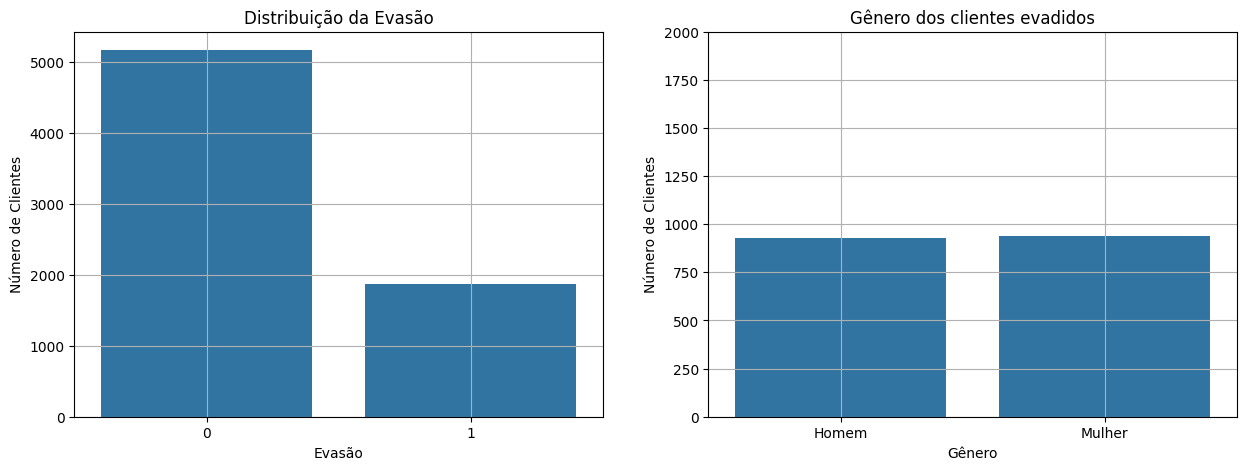

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Distribuição da Evasão
sns.countplot(x='churn', data=dados, ax=axs[0])
axs[0].set_title('Distribuição da Evasão')
axs[0].set_xlabel('Evasão')
axs[0].set_ylabel('Número de Clientes')
axs[0].grid()

# Gráfico 2: Distribuição por gênero dos clientes evadidos
sns.countplot(x='gender', data=clientes_evadidos, ax=axs[1])
axs[1].set_title('Gênero dos clientes evadidos')
axs[1].set_xlabel('Gênero')
axs[1].set_ylabel('Número de Clientes')
axs[1].set_ylim(0, 2000) # Seta o eixo-y em um limite de 2000 para facilitar a comparação
axs[1].grid()
axs[1].set_xticklabels(['Homem', 'Mulher']) # Traduz a legenda do eixo x

plt.show()

Contagem de evasão por variáveis categóricas

Identificando as colunas categóricas

In [40]:
colunas_categoricas = ['gender', 'seniorcitizen', 'partner', 'dependents','contract','paymentmethod']
colunas_categoricas

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'contract',
 'paymentmethod']

Calculando a taxa de evasão por categoria dentro da colunas_categoricas

In [42]:
taxa_evasao_categoria = {}
for col in colunas_categoricas:
  taxa_evasao = dados.groupby(col)['churn'].mean()
  taxa_evasao_categoria[col] = taxa_evasao

for col, rates in taxa_evasao_categoria.items():
  print(f"Taxa de Evasão pela categoria {col}:")
  print(rates)
  print("\n")

Taxa de Evasão pela categoria gender:
gender
Female    0.269209
Male      0.261603
Name: churn, dtype: float64


Taxa de Evasão pela categoria seniorcitizen:
seniorcitizen
0    0.236062
1    0.416813
Name: churn, dtype: float64


Taxa de Evasão pela categoria partner:
partner
0    0.329580
1    0.196649
Name: churn, dtype: float64


Taxa de Evasão pela categoria dependents:
dependents
0    0.312791
1    0.154502
Name: churn, dtype: float64


Taxa de Evasão pela categoria contract:
contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: churn, dtype: float64


Taxa de Evasão pela categoria paymentmethod:
paymentmethod
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: churn, dtype: float64




Visualizando a taxa de evasão por categoria

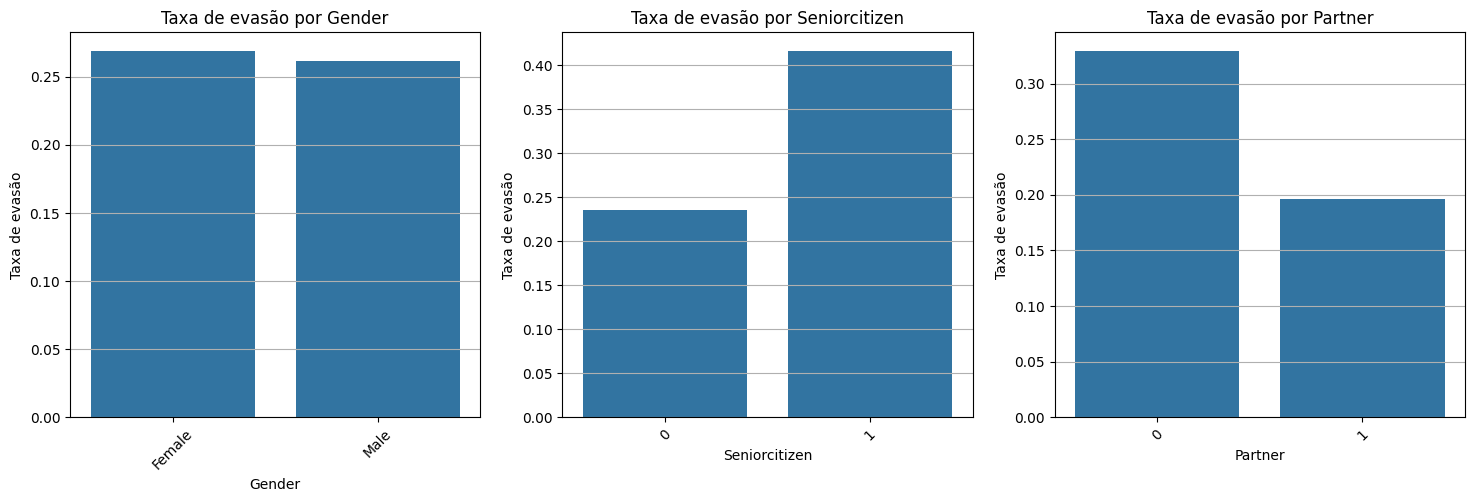

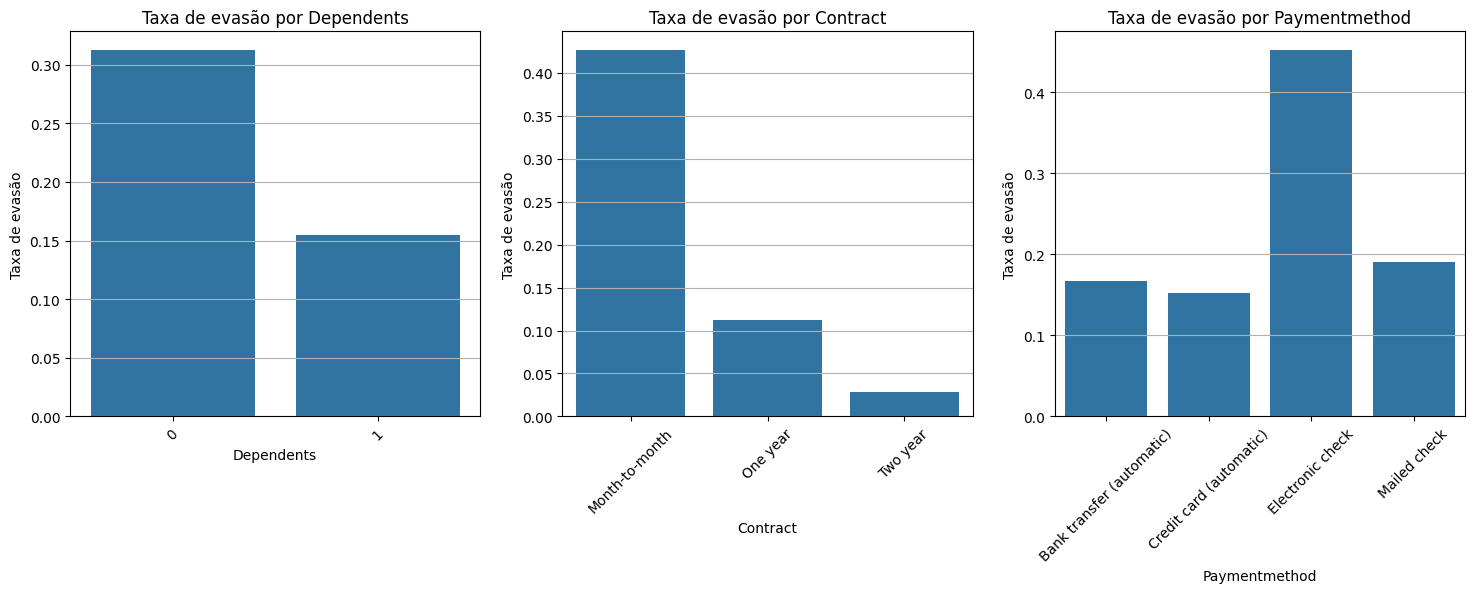

In [48]:
colunas_categoricas = list(taxa_evasao_categoria.keys())

# Cria a primeira figura com 3 gráficos
fig1, axs1 = plt.subplots(1, 3, figsize=(18, 5))

# Plota os três primeiros gráficos
for i in range(3):
    col = colunas_categoricas[i]
    rates = taxa_evasao_categoria[col]
    sns.barplot(x=rates.index, y=rates.values, ax=axs1[i])
    axs1[i].set_title(f'Taxa de evasão por {col.capitalize()}')
    axs1[i].set_xlabel(col.capitalize())
    axs1[i].set_ylabel('Taxa de evasão')
    axs1[i].tick_params(axis='x', rotation=45)
    axs1[i].grid(axis='y')

plt.show()

# Cria a segunda figura com 3 gráficos
fig2, axs2 = plt.subplots(1, 3, figsize=(18, 5))

# Plota os três últimos gráficos
for i in range(3):
    col = colunas_categoricas[i+3]
    rates = taxa_evasao_categoria[col]
    sns.barplot(x=rates.index, y=rates.values, ax=axs2[i])
    axs2[i].set_title(f'Taxa de evasão por {col.capitalize()}')
    axs2[i].set_xlabel(col.capitalize())
    axs2[i].set_ylabel('Taxa de evasão')
    axs2[i].tick_params(axis='x', rotation=45)
    axs2[i].grid(axis='y')


plt.show()

Contagem de Evasão por variáveis numéricas

Indentificando colunas numéricas

In [50]:
coluna_numerica = ['totalcharges']
coluna_numerica

['totalcharges']

Visualizando a comparação da média de 'totalcharges', entre clientes evadidos e não

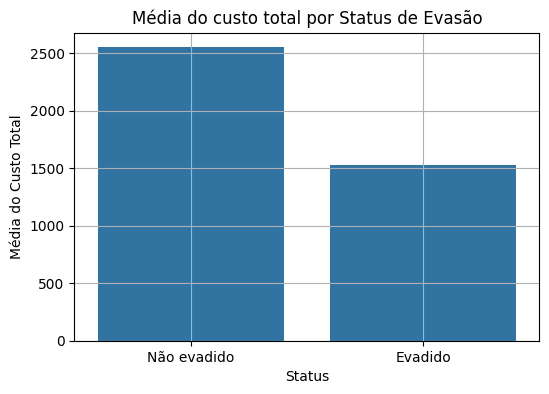

In [62]:
media_total_charges = dados.groupby('churn')['totalcharges'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='churn', y='totalcharges', data=media_total_charges)
plt.grid()
plt.title('Média do custo total por Status de Evasão')
plt.xlabel('Status')
plt.ylabel('Média do Custo Total')
plt.xticks([0, 1], ['Não evadido', 'Evadido'])
plt.show()

#📄Relatório Final

Introdução

O objetivo dessa análise é tentar entender os motivos, se existem algumas características padrão no movimento de evasão de clientes da empresa TelecomX, e o que pode ser feito para reduzir esse movimento.


Limpeza e Tratamento de Dados

Todos os dados utilizados nessa análise foram obtidos através do arquivo 'TelecomX_Data.json', por se tratar de um arquivo .json o mesmo foi submetido as etapas necessárias para se tornar um dataframe passível de leitura usando a bilioteca 'Pandas'.

A próxima etapa foi limpar o dataframe, tratar os dados nulos, inconsistentes ou dados inexistentes e alterar o tipo dos dados que não condiziam com a realidade.

A etapa final de preparação dos dados foi separar os dados que estavam aninhados em uma mesma coluna, os mesmos foram realoca-dos para colunas individuais, o que facilita não só a visualização mas também a análise exploratória dos mesmos.

Análise Exploratória de Dados

Foram feitos cálculos de algumas métricas como media, mediana e desvio padrão usando dados de custo diário, mensal e total dos clientes.

Algumas informações foram destacadas como:

Número de clientes idosos,
Número de clientes por gênero, homens e mulheres,
Número de clientes que possuem um parceiro(a),
Número de clientes que possuem dependente(s).

Avaliando a situação de evasão, foi constatado que 1869 clientes se evadiram, dentre esses foi calculada a taxa de evasão por categoria, como se o cliente evadido é idoso ou o método de pagamento que ele usava.
Com isso foi possível reconhecer quais categorias estão mais presentes entre os clientes que evadiram, juntamente com gráficos que facilitam a visualização dessas comparações.

Também foi calculado o valor médio do custo total baseado no status de evasão. Analisando o gráfico foi possível perceber que os clientes que não se evadiram possuem um custo total médio de pouco mais de 2500, enquanto os clientes evadidos possuem pouco mais de 1500.

Conclusões & Insights

Foi possível ligar algumas situações diretamente a taxa de evasão, por exemplo:

Fidelização está atrelada a uma evasão baixa: Os planos de 1 a 2 anos retêm clientes melhor do que mês a mês.

A ausência de ferramentas de segurança ou techsupport está ligada a uma evasão alta.

Dentre os clientes evadidos, os idosos são a maioria.

A grande maioria dos clientes no geral, tem um custo total médio de até 2000.


Recomendações

Transformar o contratos mês a mês em contratos anuais, oferecendo descontos por exemplo, quanto maior o tempo.

Agrupar ofertas de segurança online e tech support para clientes novos por 90 dias.

Oferecer melhores condições de internet(tipo Fibra) e promoções para os idosos, já que constituem a maioria dos clientes que se evadem.